In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import import_file, remove_before, remove_zeros, make_bins, make_equal_bins
from scipy.signal import find_peaks

In [29]:
P_01 = import_file('Alta', '2P01')
P_01.dropna(subset=['Count'], inplace=True)

In [30]:
print(P_01)

                    Date  Count
0    2024-05-01 08:04:15    0.0
1    2024-05-01 08:19:15    0.0
2    2024-05-01 08:33:23    3.0
3    2024-05-01 08:38:22   97.0
4    2024-05-01 08:43:22    0.0
...                  ...    ...
8929 2024-04-30 22:49:11    0.0
8930 2024-04-30 23:04:11    0.0
8931 2024-04-30 23:19:12    0.0
8932 2024-04-30 23:34:12    0.0
8933 2024-04-30 23:49:12    0.0

[8810 rows x 2 columns]


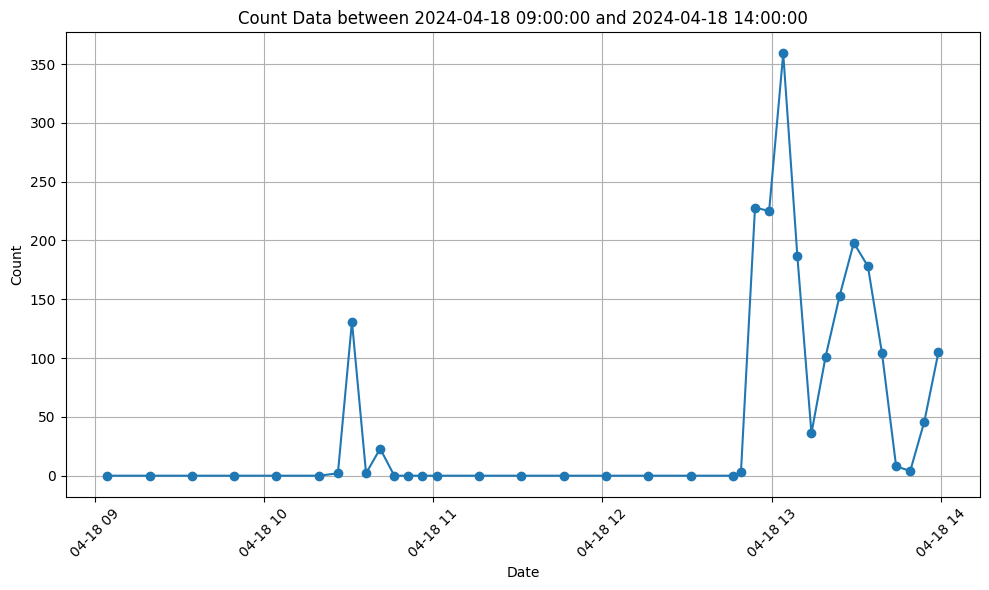

In [49]:
start_time = '2024-04-18 09:00:00'
end_time = '2024-04-18 14:00:00'
mask = (P_01['Date'] >= start_time) & (P_01['Date'] <= end_time)
filtered_data = P_01.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Data between {} and {}'.format(start_time, end_time))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

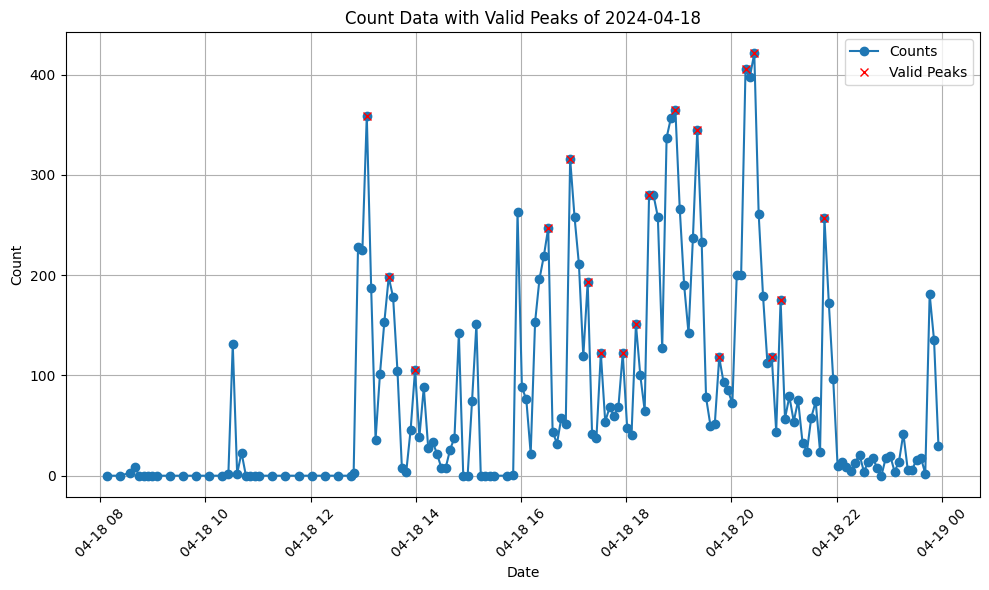

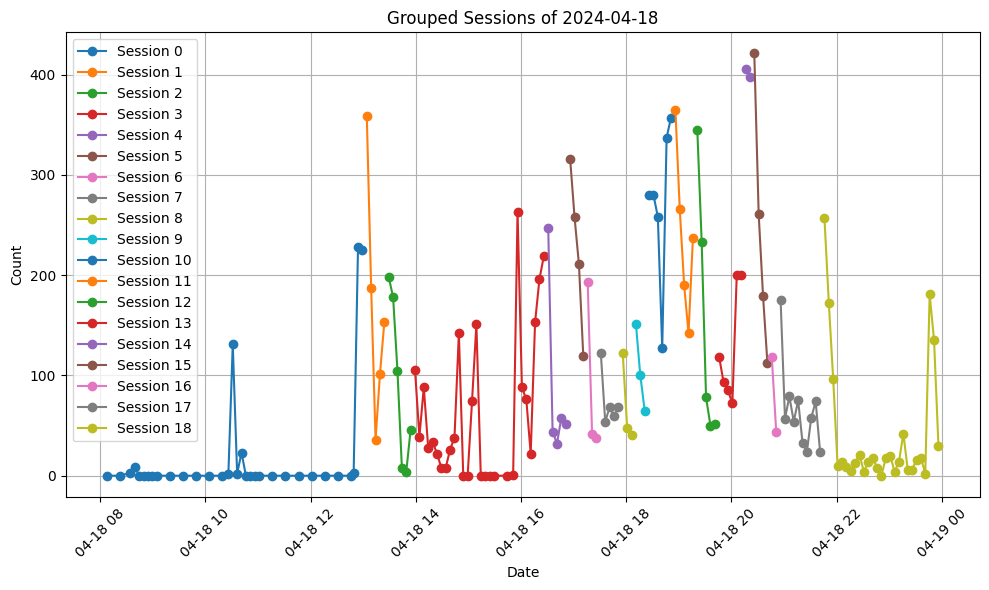

In [63]:
# For example, filter data for 18th April 2023
specific_day = '2024-04-18'
mask = P_01['Date'].dt.strftime('%Y-%m-%d') == specific_day
filtered_data = P_01.loc[mask].reset_index(drop=True)

# Step 3: Identify peaks surrounded by multiple zeros
# Using a threshold to detect peaks. Adjust 'height' as needed
peaks, _ = find_peaks(filtered_data['Count'], height=filtered_data['Count'].mean())

def is_surrounded_by_low_counts(index, series, threshold=10, num_points=3):
    precede = series[max(0, index - num_points):index]
    follow = series[index + 1:index + 1 + num_points]
    return all(precede > threshold) and all(follow > threshold) if len(precede) == num_points and len(follow) == num_points else False

# Filter peaks that are surrounded by low counts
threshold = 1
num_points = 3
valid_peaks = [index for index in peaks if is_surrounded_by_low_counts(index, filtered_data['Count'], threshold, num_points)]

# Plot the original data with valid peaks identified
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Count'], marker='o', label='Counts')
plt.plot(filtered_data['Date'].iloc[valid_peaks], filtered_data['Count'].iloc[valid_peaks], 'rx', label='Valid Peaks')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Data with Valid Peaks of 2024-04-18')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Group sessions between valid peaks
# Create a new column to indicate session groups
filtered_data['Session'] = (filtered_data.index.isin(valid_peaks)).cumsum()

# Step 5: Plot the grouped sessions
# Iterate over each session and plot separately
plt.figure(figsize=(10, 6))
for session, group in filtered_data.groupby('Session'):
    plt.plot(group['Date'], group['Count'], marker='o', label=f'Session {session}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Grouped Sessions of 2024-04-18')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


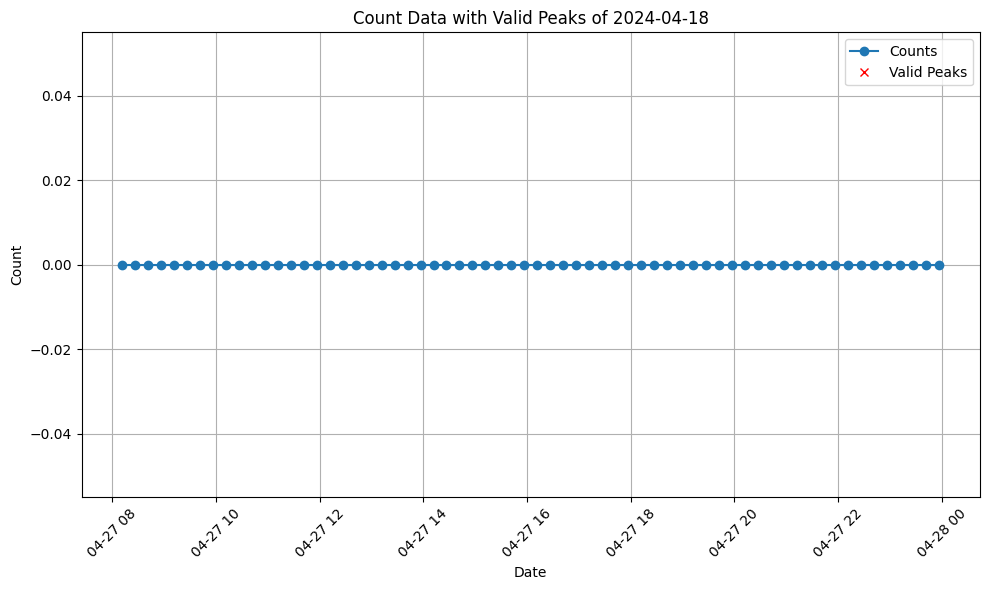

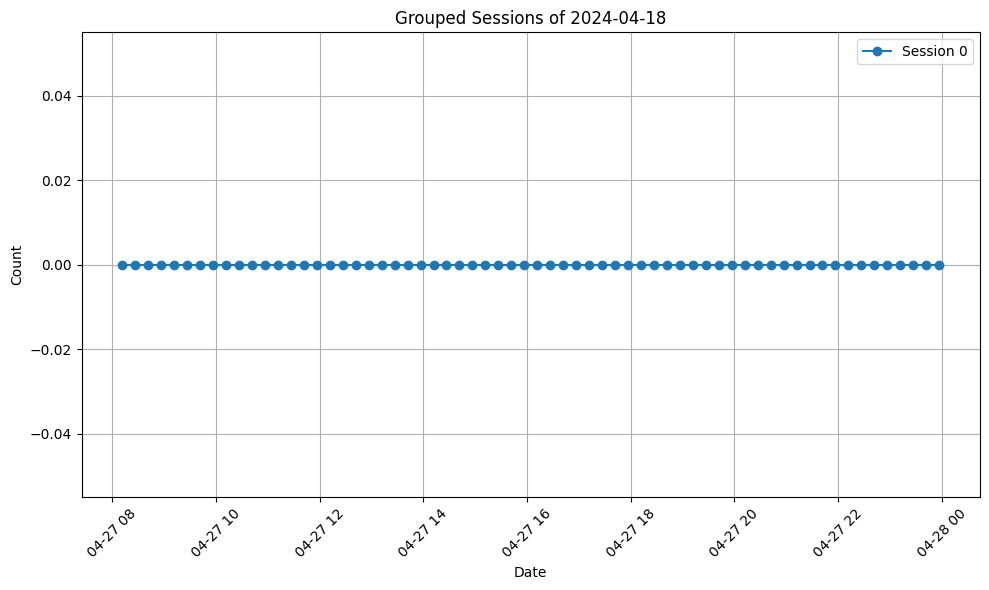

In [64]:
# For example, filter data for 18th April 2023
specific_day = '2024-04-27'
mask = P_01['Date'].dt.strftime('%Y-%m-%d') == specific_day
filtered_data = P_01.loc[mask].reset_index(drop=True)

# Step 3: Identify peaks surrounded by multiple zeros
# Using a threshold to detect peaks. Adjust 'height' as needed
peaks, _ = find_peaks(filtered_data['Count'], height=filtered_data['Count'].mean())

def is_surrounded_by_low_counts(index, series, threshold=10, num_points=3):
    precede = series[max(0, index - num_points):index]
    follow = series[index + 1:index + 1 + num_points]
    return all(precede > threshold) and all(follow > threshold) if len(precede) == num_points and len(follow) == num_points else False

# Filter peaks that are surrounded by low counts
threshold = 1
num_points = 3
valid_peaks = [index for index in peaks if is_surrounded_by_low_counts(index, filtered_data['Count'], threshold, num_points)]

# Plot the original data with valid peaks identified
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Count'], marker='o', label='Counts')
plt.plot(filtered_data['Date'].iloc[valid_peaks], filtered_data['Count'].iloc[valid_peaks], 'rx', label='Valid Peaks')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Data with Valid Peaks of 2024-04-18')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Group sessions between valid peaks
# Create a new column to indicate session groups
filtered_data['Session'] = (filtered_data.index.isin(valid_peaks)).cumsum()

# Step 5: Plot the grouped sessions
# Iterate over each session and plot separately
plt.figure(figsize=(10, 6))
for session, group in filtered_data.groupby('Session'):
    plt.plot(group['Date'], group['Count'], marker='o', label=f'Session {session}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Grouped Sessions of 2024-04-18')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
